Rafał Gąsior 407326

### Clustering Part I

#### K-means clustering - example I

* Function which create the synthetic data:

In [80]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from jqmcvi import dunn

#### Ex.1 Please analyse the function parameters and generated output.

In [81]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

#### Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.

In [82]:
X,y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.40)

#### Ex.3 Analyse the x and y shape.

In [83]:
X.shape

(120, 2)

In [84]:
y.shape

(120,)

#### Ex.4 Plot the data samples in X to see the clusters.
 #### All sklearn algorithms have a similar way of running:

    * initialize the algorithm
    * fit the model
    * predict the outcome for the data


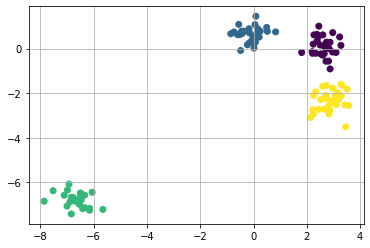

In [85]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.grid()

#### Ex.5 Run the implemented KMeans function K-Means, fit the model and predict the outcome.

In [86]:
kmeans = KMeans(n_clusters=4, init = 'random').fit(X)
pred = kmeans.predict(X)

#### Ex.6 Plot the results in order to see whether the clustering worked.

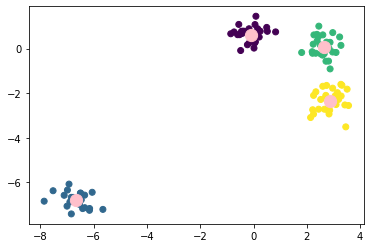

In [87]:
plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='pink', s=150);

#### Ex.7 Calculate inertia Inertia_ or Dunn index Package jgmcvi (optional). 

In [88]:
kmeans.inertia_

35.21363121600306

In [89]:
klist = [ [] for _ in range(4) ]
for i, p in enumerate(pred):
    klist[p].append(X[i,:])
print("Dunn:", dunn(klist))

Dunn: 0.33693943267365223


### K-means clustering - example II

#### Change the parameters of our data generation process to create different-looking clusters (eg. about 5 clusters and cluster_std=0.8)

In [90]:
X,y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.80)

#### Ex.1 Plot the data

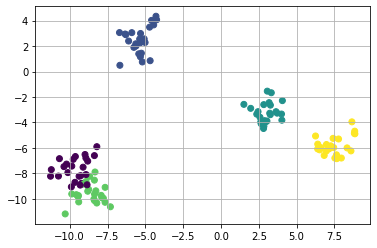

In [91]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.grid()

#### Ex.2 Predict for the same nb. of clusters = 5.

In [92]:
kmeans = KMeans(n_clusters=5, init = 'random').fit(X)
pred = kmeans.predict(X)

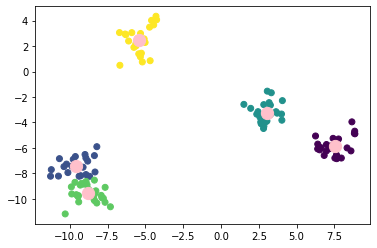

In [93]:
plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='pink', s=150);

In [94]:
kmeans.inertia_

144.90990356338835

In [95]:
klist = [[] for _ in range(5)]
for i, p in enumerate(pred):
    klist[p].append(X[i,:])
print("Dunn:", dunn(klist))

Dunn: 0.09634935137019933


#### Ex.3 Predict for 2 instead of 5 clusters.

In [96]:
kmeans = KMeans(n_clusters=2, init = 'random').fit(X)
pred = kmeans.predict(X)

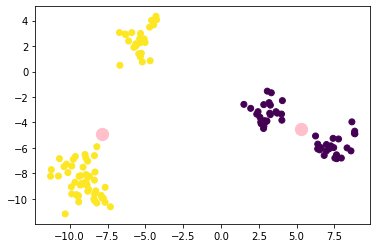

In [97]:
plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='pink', s=150);

#### Ex.4 Calculate inertia or Dunn index (optiona). 

In [98]:
kmeans.inertia_

2713.8225624635384

In [99]:
klist = [[] for _ in range(2)]
for i, p in enumerate(pred):
    klist[p].append(X[i,:])
print("Dunn:", dunn(klist))

Dunn: 0.4257410603464903


### K-means ++

#### Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function:
##### init='k-means++'
##### or init='random' in later version

In [100]:
kmeans = KMeans(n_clusters=5, init = 'k-means++').fit(X)
pred = kmeans.predict(X)

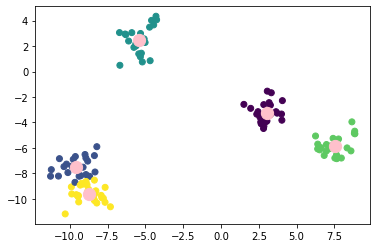

In [101]:
plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='pink', s=150);

#### Ex.2 Calculate inertia or Dunn index

In [102]:
kmeans.inertia_

144.9060357697693

In [103]:
klist = [[] for _ in range(5)]
for i, p in enumerate(pred):
    klist[p].append(X[i,:])
print("Dunn:", dunn(klist))

Dunn: 0.09083257560563869


### Elbow method
* Please implement the elbow method to choose the correct parameter value for k

#### Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.

In [104]:
distortions = []
K = range(1,21)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++')
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

C:\Users\899105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Ex.2 Plot the distortions of K-Means.


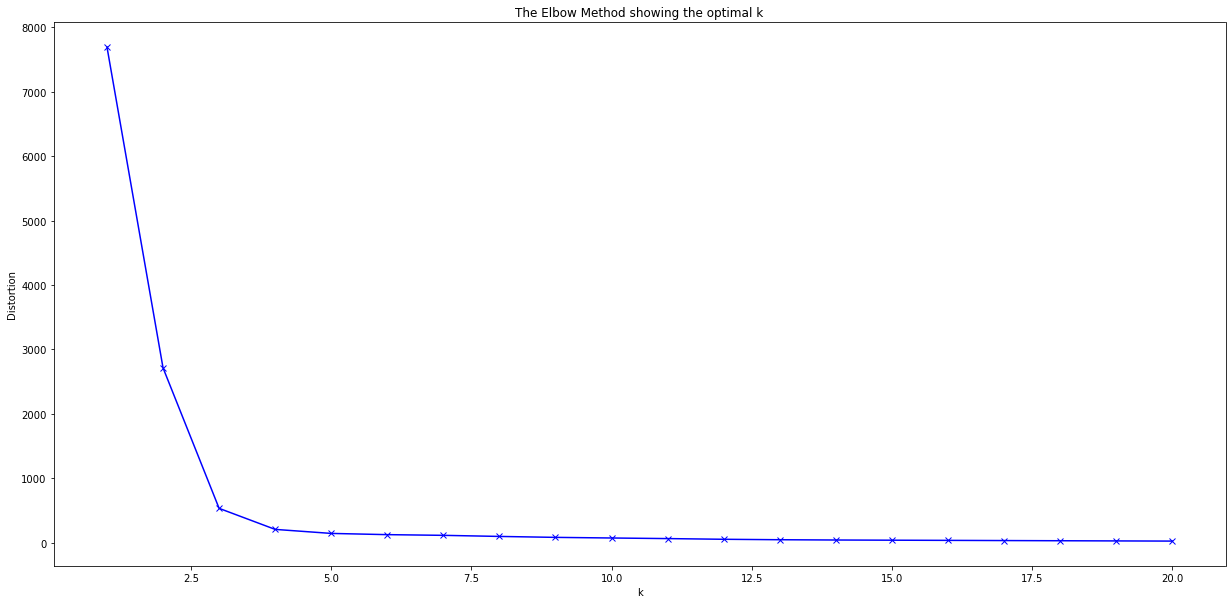

In [105]:
plt.figure(figsize=(21,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* Maximum number of a clasters is 20 Please check whether the K-Means algorithm will correctly cluster the data:

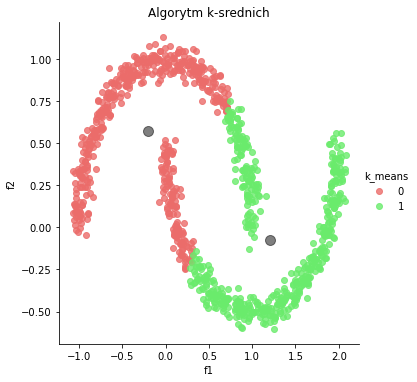

In [106]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

#TODO: Kmeans
kmeans = KMeans(init='k-means++', n_clusters=2)
kmeans.fit(x, y)
y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

### Clustering II - hierarchical methods

#### Dendrograms
* The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.

* Dataset:
* Create the dataset using make blobs function:

In [107]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

#### Ex.1 Plot the data.

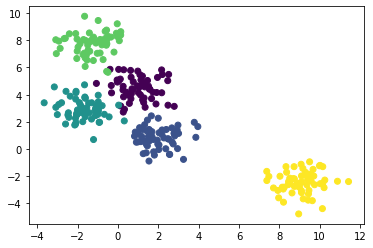

In [108]:
plt.scatter(X[:, 0], X[:, 1], c=y_true)

#### Ex.2 Use the Means function with k=2 to assign points to clusters.
* In Kmeans clustering, we provide the number of clusters and then the algorithm partitions the data. In agglomerative clustering, the data is grouped together based on the distance, and we can decide how many clusters we want, once we see how the data are grouped together.

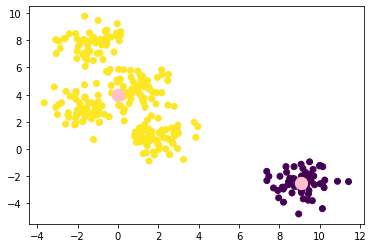

In [109]:
kmeans = KMeans(n_clusters=2, init = 'k-means++').fit(X)
pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='pink', s=150)

#### Ex.3 Use the scipy libraries to draw the dendrogram for the data:

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage

 * where:

    * linkage is the the function that performs the clustering 
    * dendrogram

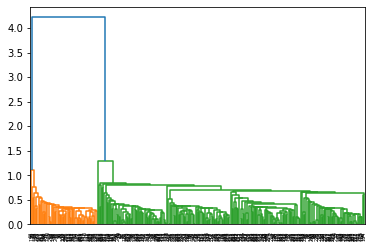

In [111]:
l = linkage(X)
d = dendrogram(l)

#### Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

In [112]:
X, y_true = make_blobs(n_samples=15, centers=5,
                       cluster_std=0.8, random_state=0)

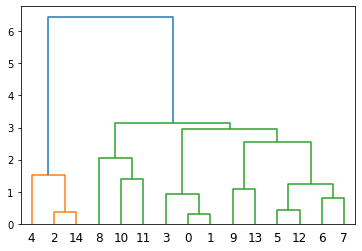

In [113]:
l = linkage(X)
d = dendrogram(l)

### Agglomerative clustering

* Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.

* There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.
* In this ex. we will focus on agglomerative clustering.

#### Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.

In [114]:
data = pd.read_csv("shopping_data.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [115]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Ex.6 Create a dendrogram to choose the appropriate k value.

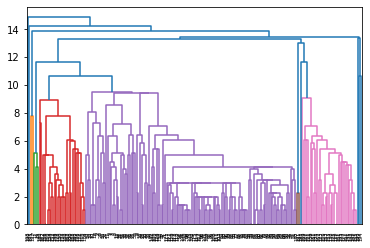

In [116]:
l = linkage(X)
d = dendrogram(l)

#### Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).

* single

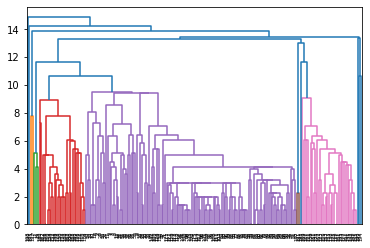

In [117]:
l = linkage(X, method = 'single')
d = dendrogram(l)

* average

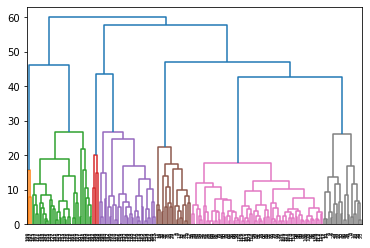

In [118]:
l = linkage(X, method = 'average')
d = dendrogram(l)

* complete

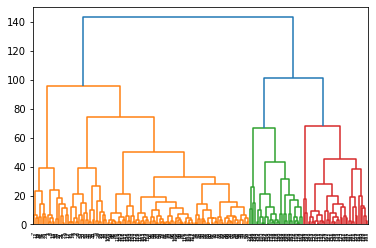

In [119]:
l = linkage(X, method = 'complete')
d = dendrogram(l)

* Ward

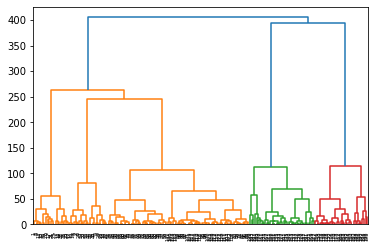

In [120]:
l = linkage(X, method = 'ward')
d = dendrogram(l)

#### Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.

In [121]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering()

In [122]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### Ex.9 Plot the clusters to see how actually our data has been clustered.

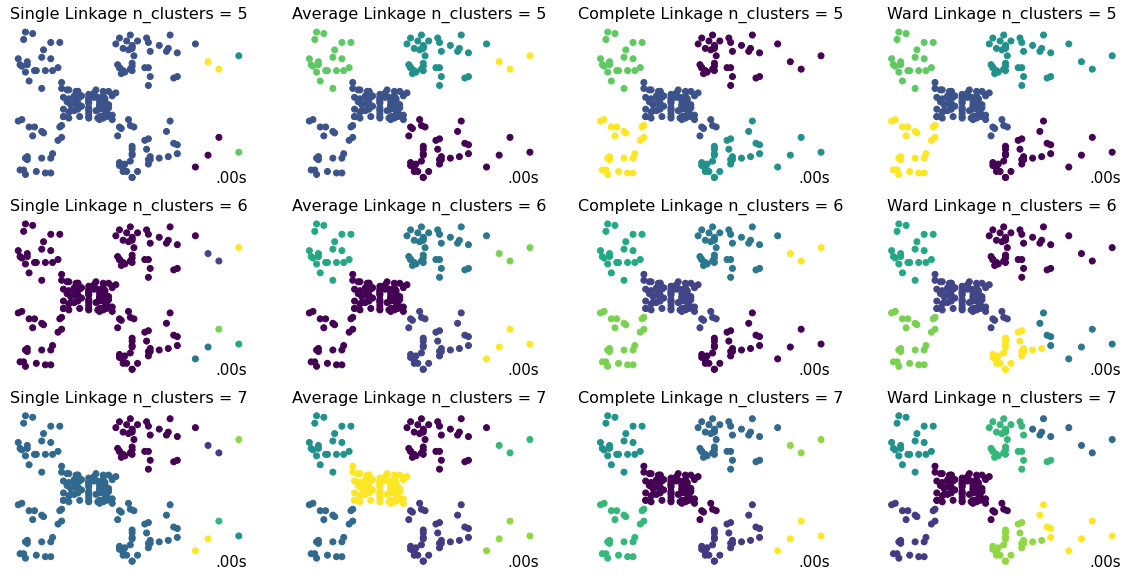

In [123]:
import time

clustering_algorithms = (
    ('Single Linkage', "single"),
    ('Average Linkage', "average"),
    ('Complete Linkage', "complete"),
    ('Ward Linkage', "ward"),
)

X = np.array(X)
plt.figure(figsize=(20, 10))
plot_num = 1

for n_clusters in range(5, 8):
    for name, linkage in clustering_algorithms:
        algorithm = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()

        plt.subplot(3, len(clustering_algorithms), plot_num)
        plt.title(name + " n_clusters = " + str(n_clusters), size=16)
        plt.scatter(X[:, 0], X[:, 1], c=algorithm.labels_)
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.axis('off')
        plot_num += 1

### Selecting the number of clusters with silhouette analysis on KMeans clustering

* During our last meeting you have used the elbow method to asses the quality of the clusters. Today we will use the silhouette analysis on KMeans clustering to assess the clusters and choose the right k value

#### Ex.1 Create the dataset

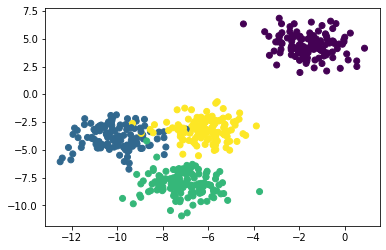

In [124]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#### Ex.2 Determine the cluster range [2,3....]

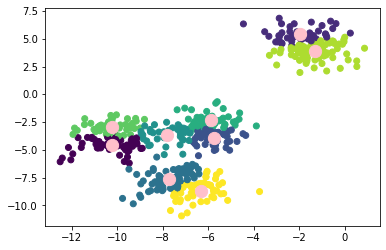

In [125]:
for n in range(2,10):
    kmeans = KMeans(n_clusters=n, init = 'k-means++').fit(X)
    pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='pink', s=150)

#### Ex.3 Iterate for all the values in cluster range:
* Perform k-Means
* Calculate and print the silhouette_score
* Compute the silhouette scores for each sample
* Aggregate the silhouette scores for samples belonging to cluster i, sort them and plot (visualization the result)
* Have a look here to check you solution and plot the silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 7 The average silhouette_score is : 0.39092211029930857
For n_clusters = 8 The average silhouette_score is : 0.33148538996489124


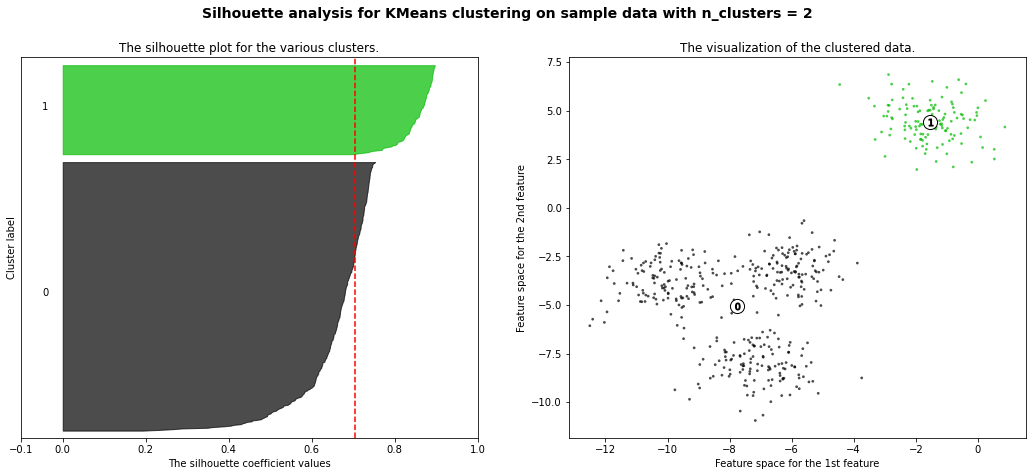

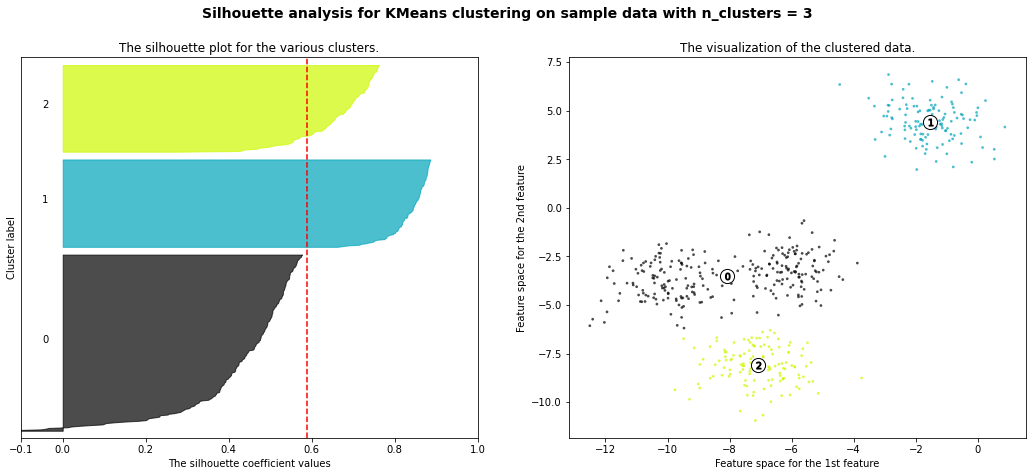

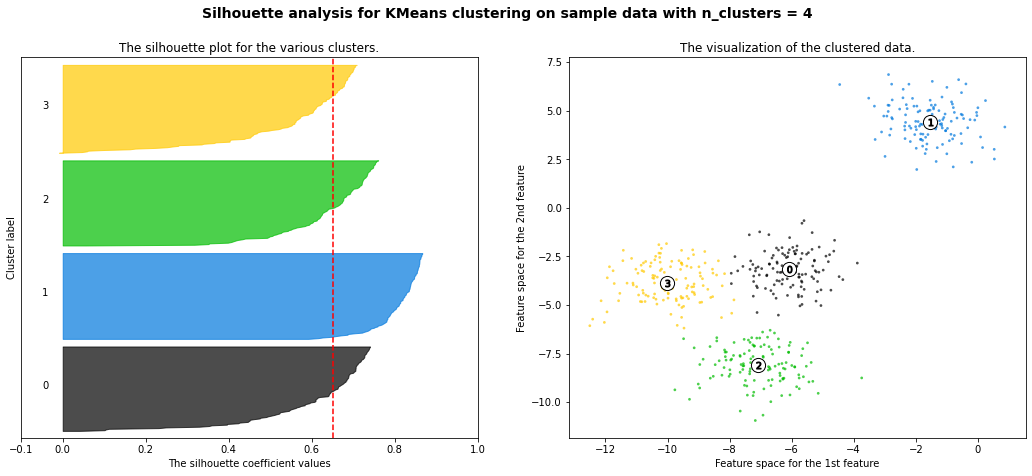

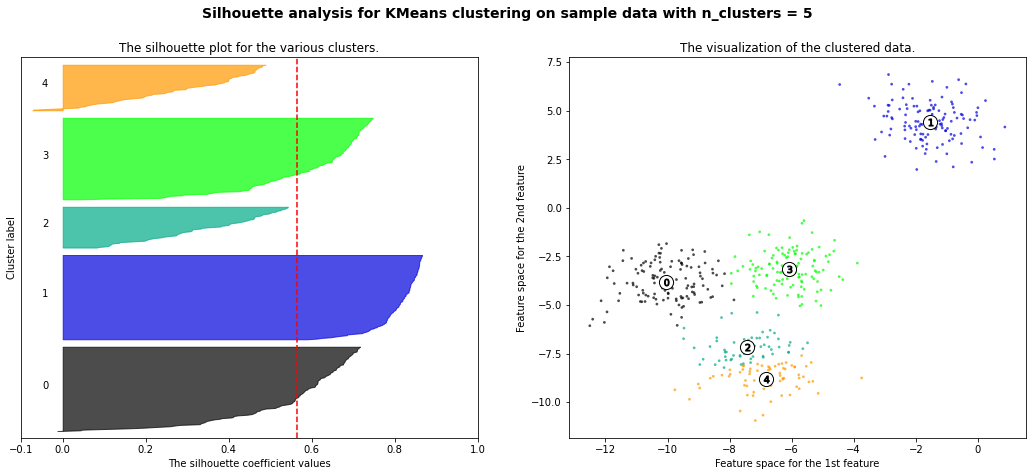

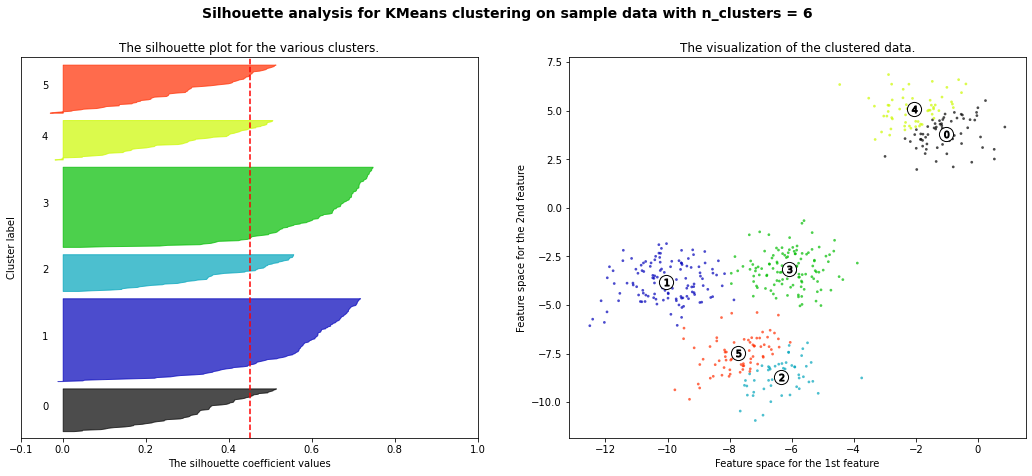

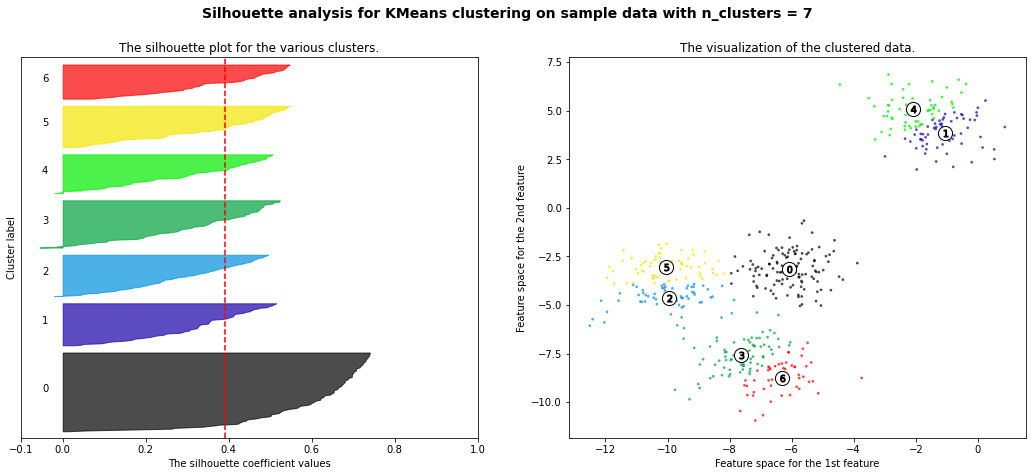

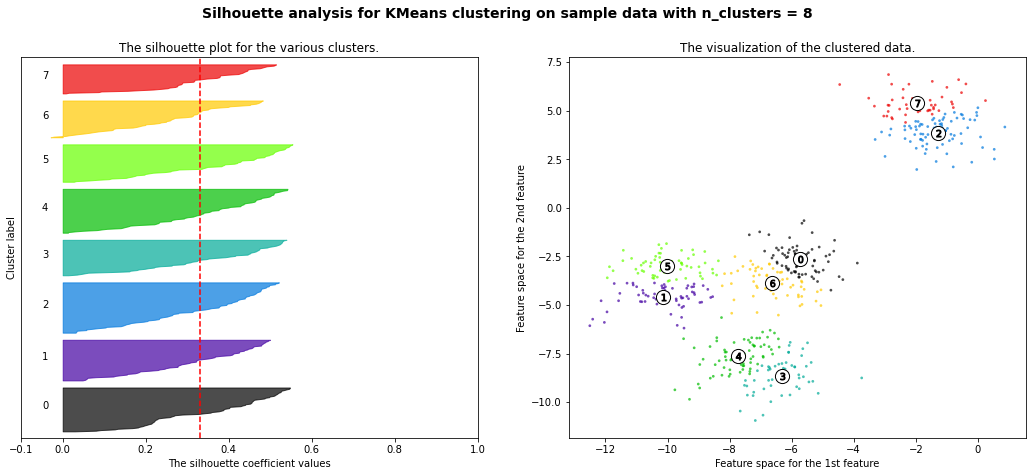

In [126]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

cluster_range = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters, fontsize=14, fontweight="bold")

plt.show()



### DBSCAN - density based clusterring

####  A density based alghorithm has saveral advantages:

    It does not require the number of clusters
    It can detect outliers - points from outside of any clusters
    It can solve all the various shapes and sizes.
However, it is pretty slow and requires a cerefull parameter selection.

#### Ex. Compare DBSCAN algorithm with k-means on the moon dataset.
Use DBSCAN from sklearn library. 

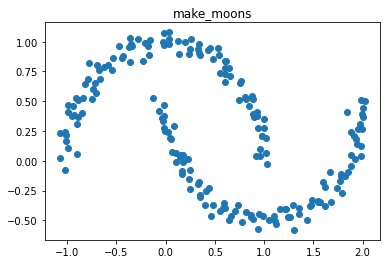

In [127]:
from sklearn.datasets import make_blobs, make_moons, make_circles
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.title("make_moons")
plt.show()

You can use make_moons, make_blobs or make_circles to experiment with the alghorithms. DBSCAN parameters have to be chosen “empirically”. 

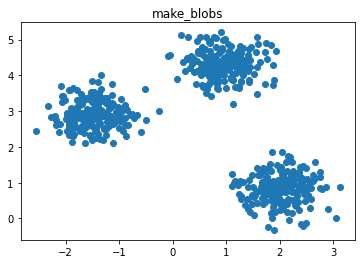

In [128]:
x, y = make_blobs(n_samples=600, cluster_std=0.4, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.title("make_blobs")
plt.show()

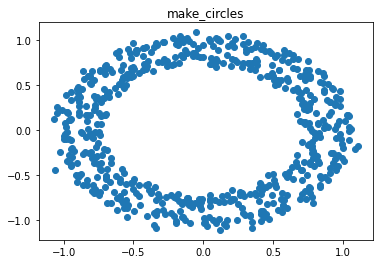

In [129]:
x, y = make_circles(n_samples=600, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.title("make_circles")
plt.show()